In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from PyAstronomy import pyasl
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn import preprocessing, svm
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df1=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\diedata_wit_minmax\die1_fulldata_minmaxdefect.csv', sep=',')
df2=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\diedata_wit_minmax\die2_fulldata_minmaxdefect.csv', sep=',')
df3=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\diedata_wit_minmax\die3_fulldata_minmaxdefect.csv', sep=',')
df4=pd.read_csv(r'D:\UserData\z0041t8e\Documents\Projects\3_TICO2\diedata_wit_minmax\die4_fulldata_minmaxdefect.csv', sep=',')

#dataset_df = pd.concat([df0, df1, df2, df3])

In [29]:
features_df1 = df1[['fDie1wflow_en3', 'fDie1wflow_en4', 'mDie1wflow_en2', 'mDie2wflow_en2', 'sleevewflow_en0', 'sleevewflow_en2','sleevewflow_en3', 'core4_en2', 'core4_en5', 'core4_en17', 'core4_en26','core5_en17', 'core5_en23', 'core5_en25', 'core5_en31', 'core6_en3','injection_en19', 'melt_Al_hight', 'Die_lub_conc', 'shot_Vel3','dayOfWeek']]
features_df2 = df2[['fDie2wflow_en2', 'mDie1wflow_en0', 'mDie1wflow_en1', 'mDie2wflow_en1', 'mDie3wflow_en0', 'mDie3wflow_en1','sleevewflow_en0', 'sleevewflow_en1', 'sleevewflow_en4', 'core3_en0','core3_en10', 'core3_en11', 'core3_en15', 'core3_en23', 'core3_en26', 'core4_en5', 'core4_en7', 'core4_en19','core4_en29', 'core4_en30', 'core5_en15', 'core5_en16','core5_en23', 'core5_en26', 'core5_en27', 'core5_en31', 'core6_en8','core6_en12', 'core6_en14', 'core6_en15', 'core6_en27', 'core6_en29','ep_en6', 'ep_en11', 'ep_en13', 'injection_en11', 'lub_en1', 'lub_en2','lub_en3', 'melt_Al_hight', 'shot_Vel3', 'tiebar_en13']]
features_df3 = df3[['fDie1wflow_en1', 'fDie1wflow_en3', 'fDie2wflow_en1', 'fDie2wflow_en2','mDie1wflow_en0', 'mDie2wflow_en1', 'sleevewflow_en0','sleevewflow_en2', 'sleevewflow_en3', 'core4_en8', 'core4_en15','core5_en14', 'core5_en21', 'core5_en26', 'core6_en2', 'core6_en16','core6_en28', 'core6_en29', 'ep_en2', 'ep_en3', 'ep_en5', 'ep_en8','ep_en10', 'ep_en12', 'ep_en14', 'injection_en1', 'injection_en11','injection_en13', 'injection_en14', 'injection_en18', 'injection_en21','injection_en24', 'injection_en28', 'lub_en2', 'lub_en4','melt_Al_wflow_temp', 'melt_Al_hight', 'Die_lub_conc', 'shot_Vel1','shot_Vel3', 'shot_Vel4', 'shot_MetalPress.', 'tiebar_en1','tiebar_en3', 'tiebar_en6', 'tiebar_en7', 'tiebar_en9', 'tiebar_en14']]
features_df4 = df4[['fDie1wflow_en1', 'fDie1wflow_en2', 'mDie2wflow_en0', 'mDie2wflow_en2','mDie3wflow_en4', 'sleevewflow_en3', 'tipwflow_en1', 'core3_en8','core3_en19', 'core3_en28', 'core4_en0', 'core4_en7', 'core4_en27','core4_en29', 'core4_mae', 'core5_en3', 'core5_en6', 'core5_en8','core5_en31', 'core6_en1', 'core6_en4', 'core6_en9', 'core6_en12','core6_en22', 'core6_en31', 'core6_mse', 'ep_en0', 'ep_en2', 'ep_en5','ep_en6', 'ep_en7', 'ep_en10', 'injection_en4', 'injection_en6','injection_en10', 'injection_en12', 'injection_en23', 'injection_en25','injection_en30', 'lub_en3', 'lub_en4', 'shot_Vel2', 'shot_Vel3','shot_Vel4', 'shot_MetalPress.', 'tiebar_en2', 'tiebar_en6','tiebar_en12', 'tiebar_en14', 'tiebar_en15']]
lables_df1 = df1[['defect','max_ratio','min_ratio']]
lables_df2 = df2[['defect','max_ratio','min_ratio']]
lables_df3 = df3[['defect','max_ratio','min_ratio']]
lables_df4 = df4[['defect','max_ratio','min_ratio']]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_df1_scld = scaler.fit_transform(features_df1)
features_df2_scld = scaler.fit_transform(features_df2)
features_df3_scld = scaler.fit_transform(features_df3)
features_df4_scld = scaler.fit_transform(features_df4)

C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\z0041t8e\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features_df3_scld, lables_df3['min_ratio'].values, test_size=0.4)
model = svm.SVR(kernel='rbf', gamma='auto')
model.fit(X_train, y_train)
y_prdct = model.predict(X_test)
mean_squared_error(y_test,y_prdct)

2.5037012898083306

In [70]:
model.score(X_test, y_test)  

0.3590933305257764

<IPython.core.display.Javascript object>


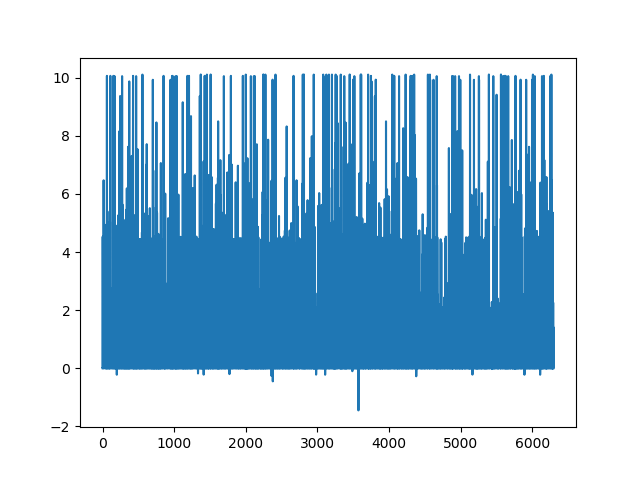

In [71]:
%matplotlib notebook
plt.plot(range(6297), y_test)

<IPython.core.display.Javascript object>


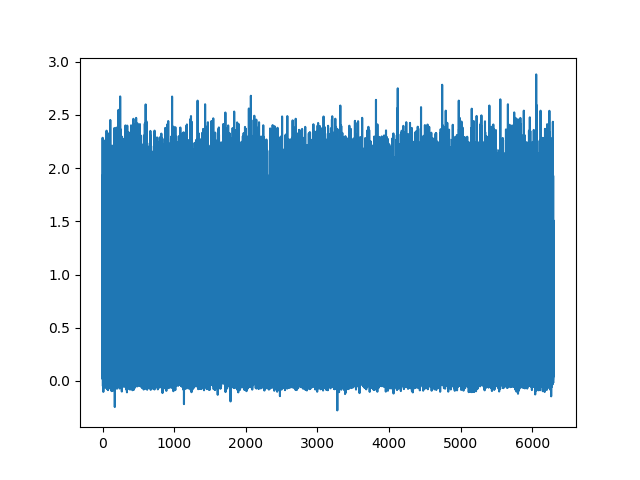

In [72]:
plt.figure(2)
plt.plot(y_prdct)

In [46]:
y_prdct.shape

(6297,)

In [47]:
y_test.shape

(6297,)

In [61]:
lables_df3['max_ratio'].values

array([0., 0., 0., ..., 0., 0., 0.])